In [123]:
import pandas as pd
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

In [124]:
train_path = "train.csv"
data_titanic = pd.read_csv(train_path,index_col = "PassengerId")

# Context
    These data represent survivors and non-survivors from the Titanic.
    The data of the persons are charachterized by gender, age, ticket number, etc. (Total 12 columns)
    Goal/Target for data analisis is find the parametrs wich give us chance to survive Titanic or smt like that




In [125]:
data_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


    We can see wich decks survive the most
        -First class cabins were located on decks from A to E 
        -Second class cabins were located on decks from D to G
        -Third class cabins were located on decks from D to G


    Folding boats were designed for 47 people each. The total capacity of the boats was 1,178 people, while the steamer was designed for 2,556 passengers and 908 crew members
    
    
    

# Data quality assessment
    Here we will speak about our data.

1. – Cheking uniq values and data 

    1.1. As we see below,there is some nonunic name+surnames combinations.We can't drop them as they not duplicated rows.For example, here are the strings with the name "Adams, Charles".

In [126]:
titanic_unic_names = data_titanic.groupby("Name").size()
titanic_unic_names[titanic_unic_names > 1].count()
data_titanic = data_titanic.drop_duplicates()
titanic_unic_names = data_titanic.groupby("Name").size()
titanic_unic_names[titanic_unic_names > 1].count()
data_titanic[data_titanic.Name == "Adams, Charles"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
4756,0,3,"Adams, Charles",male,43.0,0,0,448854,24.48,NaN,S
53997,0,3,"Adams, Charles",male,24.0,0,0,46829,6.19,NaN,S
65259,0,2,"Adams, Charles",male,51.0,1,1,4121045,12.23,NaN,S
73925,1,3,"Adams, Charles",male,7.0,1,0,A/5,12.69,NaN,S
83604,1,1,"Adams, Charles",male,61.0,0,0,SC/AH 423519,54.77,B11325,Q



2. – Cheking Nan values and replasing them or droping 

In [127]:
data_titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

    -  Age colum. We will replace age missing data with mean of this data,becouse its will not affect so strong the reserch it will be like 3%(3292(count of NAN in age)/100000(row count))

In [128]:
data_titanic["Age"] = data_titanic["Age"].fillna(round(data_titanic["Age"].mean(),0))

    - Ticket collum.I don't know what to link the tickets to and where to get the values from.So just ingnore the values, although in general it was possible to take mode or generate your own values.

In [129]:
data_titanic["Ticket"] = data_titanic["Ticket"].fillna("No")

    - Fare colum. Change Nan to mean value.

In [130]:
data_titanic["Fare"] = data_titanic["Fare"].fillna(data_titanic["Fare"].mean())

    - Cabin column.As we can see, the amount of missing data in the cabin column does not allow us to qualitatively investigate using this column, and if we replace it with average or mode, it will negatively affect the quality.so the solution is simply not to use this column in the investigation or use it to a minimum.

In [131]:
data_titanic["Cabin"] = data_titanic["Cabin"].fillna("NO")

    - Embarked      

In [132]:
data_titanic = data_titanic.dropna()

    Result of changing NAN

In [141]:
data_titanic.isnull().values.any()

False

3. – Cheking colums types and changing it

    

In [134]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 99999
Data columns (total 11 columns):
Survived    99750 non-null int64
Pclass      99750 non-null int64
Name        99750 non-null object
Sex         99750 non-null object
Age         99750 non-null float64
SibSp       99750 non-null int64
Parch       99750 non-null int64
Ticket      99750 non-null object
Fare        99750 non-null float64
Cabin       99750 non-null object
Embarked    99750 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 9.1+ MB


    3.1 Changing choise values to numeric

    

In [135]:
Sex_data = pd.DataFrame({'Sex': ["male", "female"], 'Sex_id': [0, 1]})
data_titanic = data_titanic.merge(Sex_data,left_on = "Sex" 
                                                  ,right_on = "Sex" 
                                                  ,how = "left" )
data_titanic.drop(axis=1, index=None, columns=["Sex"],inplace=True)
Embark_data = pd.DataFrame({'Embarked': ["S", "Q","C"], 'Embark_id': [0, 1,2]})
data_titanic = data_titanic.merge(Embark_data,left_on = "Embarked" 
                                                  ,right_on = "Embarked" 
                                                  ,how = "left" )
data_titanic.drop(axis=1, index=None, columns=["Embarked"],inplace=True)
data_titanic.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_id,Embark_id
0,1,1,"Oconnor, Frankie",38.00,2,0,209245,27.14,C12239,0,0
1,0,3,"Bryan, Drew",38.00,0,0,27323,13.35,NO,0,0
2,0,3,"Owens, Kenneth",0.33,1,2,CA 457703,71.29,NO,0,0
3,0,3,"Kramer, James",19.00,0,0,A. 10866,13.04,NO,0,0
4,1,3,"Bond, Michael",25.00,0,0,427635,7.76,NO,0,0
5,0,2,"Sassano, Jonathan",35.00,0,0,13363,6.71,NO,0,0
6,0,3,"Conway, Jose",7.00,0,0,A/5,9.77,NO,0,0
7,1,3,"Werner, Linda",6.00,1,2,434426,31.50,NO,1,0
8,0,1,"Wardlaw, Michael",27.00,2,1,474849,73.02,A7253,0,0
9,0,2,"Greigo, Rudy",66.00,0,0,6981,9.14,D2969,0,2


# Data exploration
    let's find the correlation

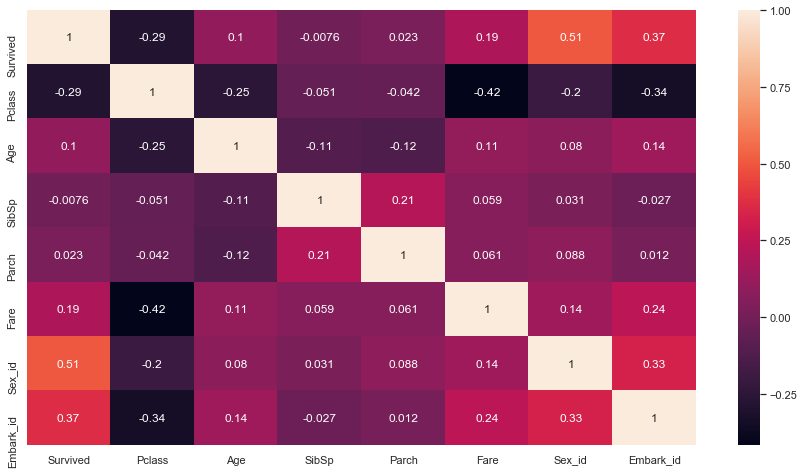

In [136]:
#data_titanic.info()
data_titanic.isnull().values.any()
#sns.figure(24,23)
sns.heatmap(data_titanic.corr(), annot=True)


    We can find some intersting facts:
        Survived to (Sex,Embarked,Pclass,fare,Age) Another colums have smal like <= 0.1 value.This colums we will use to reseach survive ability on titanic.I really want to use cabin for find survive ability(In my opinion, the deck would greatly affect survival),but i can't use this because of the large amount of missing data.If i generate or reconnect with fare or a ticket it will lower the quality of research.
        
        Another interesting fact wich we can reasearch is economic status of persos.Its basased on fare to (Age,sex).Fare is coreeleted with Pclass.

# Summary

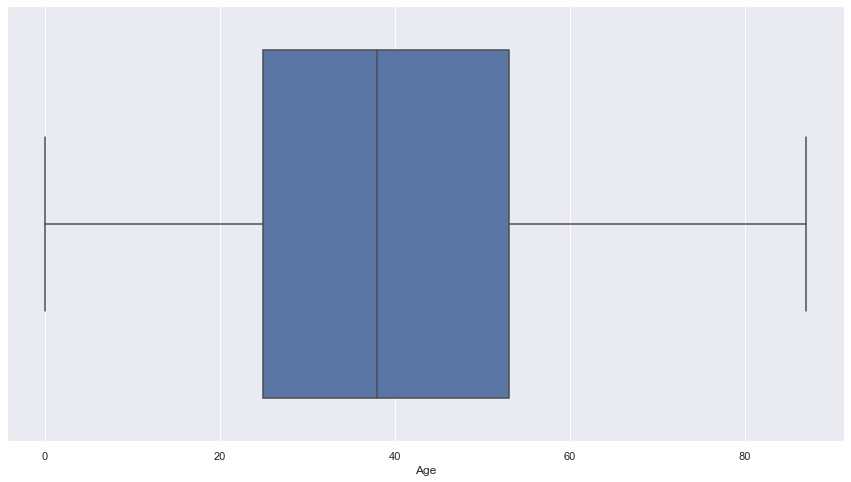

In [137]:
sns.boxplot(data_titanic.Age)